In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta
import matplotlib

df1 = pd.read_csv("../../data/raw/smard/smard_consumption_DE.csv", sep=";")
df2 = pd.read_csv("../../data/raw/smard/smard_generation_DE.csv", sep=";")

## First look

In [3]:
df1.describe()


,Date,Start,End,Total (grid load) [MWh] Calculated resolutions,Residual load [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions
count,78888,78888,78888,78888,78888,78888
unique,3287,24,24,61088,64335,18888
top,"Oct 30, 2016",12:00 AM,1:00 AM,"45,937","34,007.25",0
freq,25,3287,3287,7,6,579


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Date                                               78888 non-null  object
 1   Start                                              78888 non-null  object
 2   End                                                78888 non-null  object
 3   Total (grid load) [MWh] Calculated resolutions     78888 non-null  object
 4   Residual load [MWh] Calculated resolutions         78888 non-null  object
 5   Hydro pumped storage [MWh] Calculated resolutions  78888 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [5]:
df1.head()

,Date,Start,End,Total (grid load) [MWh] Calculated resolutions,Residual load [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions
0,"Jan 1, 2015",12:00 AM,1:00 AM,"44,600.25","35,955.75",601.5
1,"Jan 1, 2015",1:00 AM,2:00 AM,"43,454.75","34,641",346.25
2,"Jan 1, 2015",2:00 AM,3:00 AM,"41,963.25","32,909.25",521.75
3,"Jan 1, 2015",3:00 AM,4:00 AM,"40,617.75","31,548","1,228.25"
4,"Jan 1, 2015",4:00 AM,5:00 AM,"39,936.75","30,773.5","1,821.5"


In [6]:
df1["date"] = pd.to_datetime(df1['Date'] + ' ' + df1['Start'], format='%b %d, %Y %I:%M %p')
df1 = df1.drop(columns=["Date", "Start", "End"])
df1 = df1.rename(columns={"Total (grid load) [MWh] Calculated resolutions": "load"})
df1 = df1[["date"] + ["load"]]
df1["load"] = df1["load"].str.replace(',', '').astype(float)
df1

,date,load
0,2015-01-01 00:00:00,44600.25
1,2015-01-01 01:00:00,43454.75
2,2015-01-01 02:00:00,41963.25
3,2015-01-01 03:00:00,40617.75
4,2015-01-01 04:00:00,39936.75
...,...,...
78883,2023-12-31 19:00:00,50254.75
78884,2023-12-31 20:00:00,47086.50
78885,2023-12-31 21:00:00,45238.50
78886,2023-12-31 22:00:00,44099.25


In [7]:
df1.describe()

,date,load
count,78888,78888.000000
mean,2019-07-02 12:05:15.972011008,56360.112254
min,2015-01-01 00:00:00,30909.000000
25%,2017-04-01 18:45:00,48133.375000
50%,2019-07-02 12:30:00,56045.625000
75%,2021-10-01 06:15:00,64691.625000
max,2023-12-31 23:00:00,81077.500000
std,NaN,10000.237611


## df2

In [8]:
df2.describe()

,Other renewable [MWh] Calculated resolutions
count,78888.000000
mean,160.234158
std,41.054754
min,50.250000
25%,131.000000
50%,157.000000
75%,191.000000
max,260.000000


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               78888 non-null  object 
 1   Start                                              78888 non-null  object 
 2   End                                                78888 non-null  object 
 3   Biomass [MWh] Calculated resolutions               78888 non-null  object 
 4   Hydropower [MWh] Calculated resolutions            78888 non-null  object 
 5   Wind offshore [MWh] Calculated resolutions         78888 non-null  object 
 6   Wind onshore [MWh] Calculated resolutions          78888 non-null  object 
 7   Photovoltaics [MWh] Calculated resolutions         78888 non-null  object 
 8   Other renewable [MWh] Calculated resolutions       78888 non-null  float64
 9   Nuclea

In [10]:
df2.head()

,Date,Start,End,Biomass [MWh] Calculated resolutions,Hydropower [MWh] Calculated resolutions,Wind offshore [MWh] Calculated resolutions,Wind onshore [MWh] Calculated resolutions,Photovoltaics [MWh] Calculated resolutions,Other renewable [MWh] Calculated resolutions,Nuclear [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions
0,"Jan 1, 2015",12:00 AM,1:00 AM,"4,024.25","1,158.25",516.5,"8,128",0,133.0,"10,710.5","15,687.25","3,219.75","1,226.25","1,525.75","4,909.25"
1,"Jan 1, 2015",1:00 AM,2:00 AM,"3,982.75","1,188",516.25,"8,297.5",0,122.5,"11,086.25","15,321.75","2,351.25",870.75,"1,079.25","4,932.75"
2,"Jan 1, 2015",2:00 AM,3:00 AM,"4,019.5","1,139.25",514,"8,540",0,93.0,"11,026.25","14,817.5","2,227",809.5,787,"5,041.75"
3,"Jan 1, 2015",3:00 AM,4:00 AM,"4,040.75","1,122.5",517.75,"8,552",0,86.5,"11,027.75","14,075","2,339.75",821,287.75,"5,084"
4,"Jan 1, 2015",4:00 AM,5:00 AM,"4,037.75","1,112",519.75,"8,643.5",0,86.5,"10,962.25","14,115","2,461.5",831.25,346.75,"5,070.75"


In [11]:
df2["date"] = pd.to_datetime(df2['Date'] + ' ' + df2['Start'], format='%b %d, %Y %I:%M %p')
df2 = df2.drop(columns=["Date", "Start", "End"])
df2["wind_gen"] = df2["Wind offshore [MWh] Calculated resolutions"].str.replace(',', '').astype(float) + df2["Wind onshore [MWh] Calculated resolutions"].str.replace(',', '').astype(float)
df2 = df2.rename(columns={"Photovoltaics [MWh] Calculated resolutions": "solar_gen", "Hydro pumped storage [MWh] Calculated resolutions": "hydro_storage_gen"})
df2 = df2[["date", "wind_gen", "solar_gen"]]
df2["solar_gen"] = df2["solar_gen"].str.replace(',', '').astype(float)
#df2["hydro_storage_gen"] = df2["hydro_storage_gen"].str.replace(',', '').astype(float)

In [12]:
df2 = df2.drop(columns=("date"))
df = pd.concat((df1, df2), axis=1)

#Convert to UTC time
df['date'] = df['date'].dt.tz_localize('Europe/Berlin', ambiguous='infer').dt.tz_convert('UTC')

# Convert to permanent utc+1 which is cet winter time.
df['date'] =  df['date'] + timedelta(hours=1) 
df


,date,load,wind_gen,solar_gen
0,2015-01-01 00:00:00+00:00,44600.25,8644.50,0.0
1,2015-01-01 01:00:00+00:00,43454.75,8813.75,0.0
2,2015-01-01 02:00:00+00:00,41963.25,9054.00,0.0
3,2015-01-01 03:00:00+00:00,40617.75,9069.75,0.0
4,2015-01-01 04:00:00+00:00,39936.75,9163.25,0.0
...,...,...,...,...
78883,2023-12-31 19:00:00+00:00,50254.75,35471.50,0.0
78884,2023-12-31 20:00:00+00:00,47086.50,36230.75,0.0
78885,2023-12-31 21:00:00+00:00,45238.50,36056.25,0.0
78886,2023-12-31 22:00:00+00:00,44099.25,36031.25,0.0


In [13]:
df.to_csv("./../../data/preproc/smard_data.csv", index=False)
df.describe()
#494 TWh pro Jahr

,load,wind_gen,solar_gen
count,78888.000000,78888.000000,78888.000000
mean,56360.112254,12686.029973,4961.646844
std,10000.237611,9861.741766,7743.779553
min,30909.000000,81.500000,0.000000
25%,48133.375000,4914.750000,0.000000
50%,56045.625000,9894.000000,147.500000
75%,64691.625000,18143.750000,7768.875000
max,81077.500000,52399.000000,40673.750000


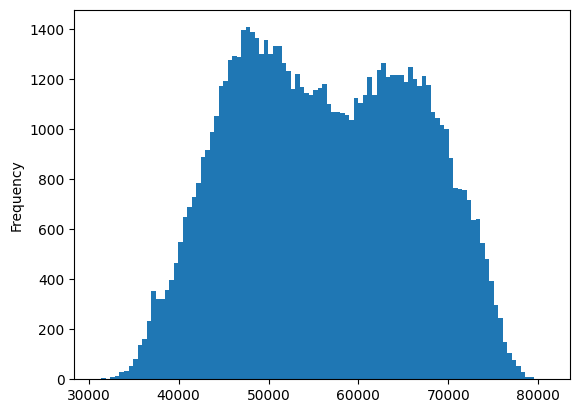

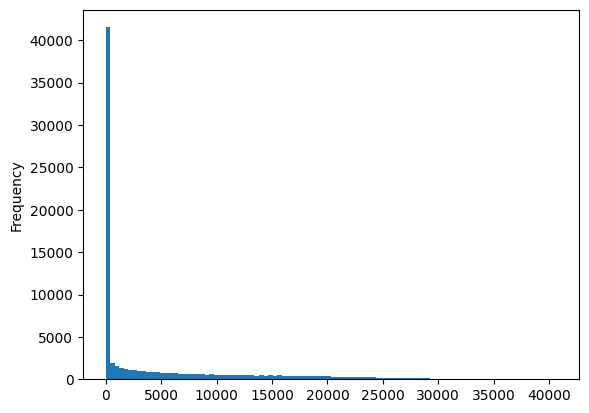

<Axes: ylabel='Frequency'>

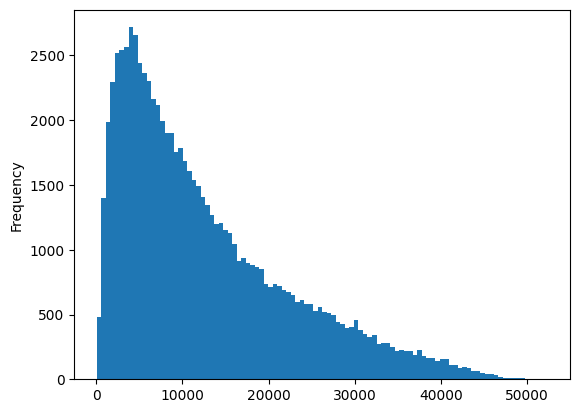

In [14]:
import matplotlib.pyplot as plt

df['load'].plot.hist(bins=100)
plt.show()
df['solar_gen'].plot.hist(bins=100)
plt.show()
df['wind_gen'].plot.hist(bins=100)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       78888 non-null  datetime64[ns, UTC]
 1   load       78888 non-null  float64            
 2   wind_gen   78888 non-null  float64            
 3   solar_gen  78888 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 2.4 MB


In [16]:
df_cropped = df[49000:50000]
df_cropped.head(30)

,date,load,wind_gen,solar_gen
49000,2020-08-03 16:00:00+00:00,57065.25,4174.50,7724.00
49001,2020-08-03 17:00:00+00:00,56857.75,4423.00,4793.75
49002,2020-08-03 18:00:00+00:00,56067.50,4197.50,2187.75
49003,2020-08-03 19:00:00+00:00,54212.00,3678.75,421.25
49004,2020-08-03 20:00:00+00:00,52430.50,3884.00,3.25
49005,2020-08-03 21:00:00+00:00,49200.50,4286.25,0.00
49006,2020-08-03 22:00:00+00:00,44933.25,4304.25,0.00
49007,2020-08-03 23:00:00+00:00,42203.75,4240.00,0.00
49008,2020-08-04 00:00:00+00:00,40838.00,4689.50,0.00
49009,2020-08-04 01:00:00+00:00,39984.00,4953.25,0.00


['load', 'wind_gen', 'solar_gen']


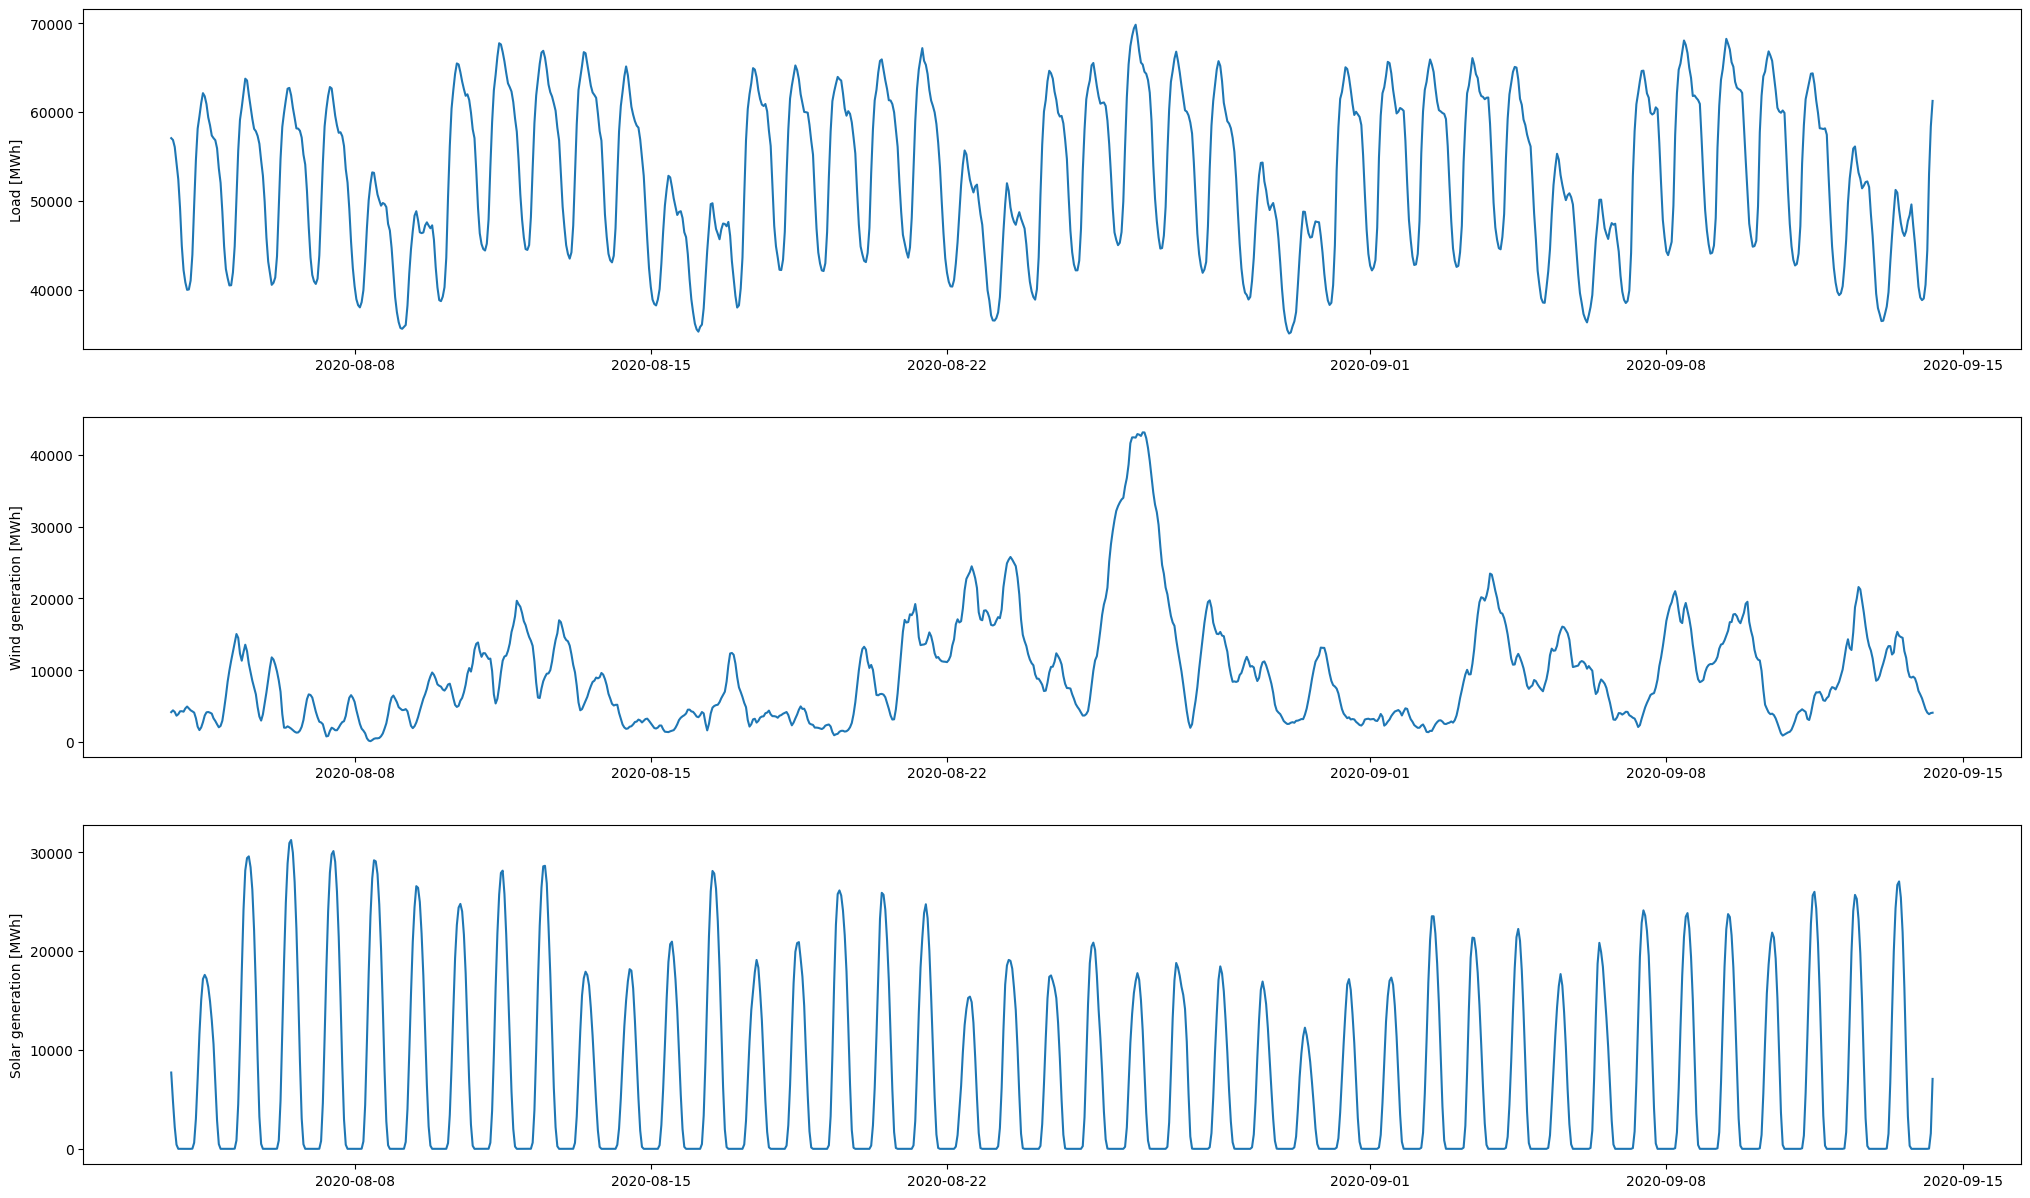

In [17]:
# plot different time series
skip_days = 14
skip_hours = 24*skip_days

keys = list(df.drop(columns="date").columns)
print(keys)
labels = keys
axis_labels = ["Load [MWh]", "Wind generation [MWh]", "Solar generation [MWh]"]

fig, axs = plt.subplots(3,1, figsize=(25,15), dpi=100)

for i, (key, label) in enumerate(zip(keys, labels)):
    axs[i].plot(df_cropped['date'], df_cropped[key], label=label)
    #axs[i].set_xticks(np.array(list(df_cropped['date']))[::skip_hours])
    #axs[i].legend()
    font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}

    matplotlib.rc('font', **font)
    #axs[i].set_xlabel("Time")
    axs[i].set_ylabel(axis_labels[i])
#font = {'family' : 'arial',
        #'weight' : 'bold',
        #'size'   : 22}

matplotlib.rc('font', **font)
plt.show()

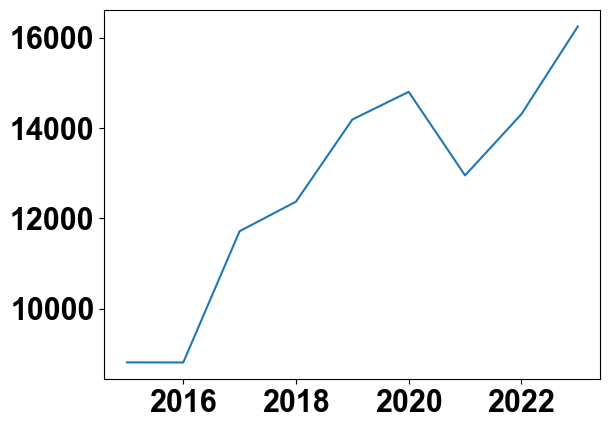

In [18]:
# plot 
means = df["wind_gen"].groupby(df["date"].dt.year).mean()
plt.plot(means)

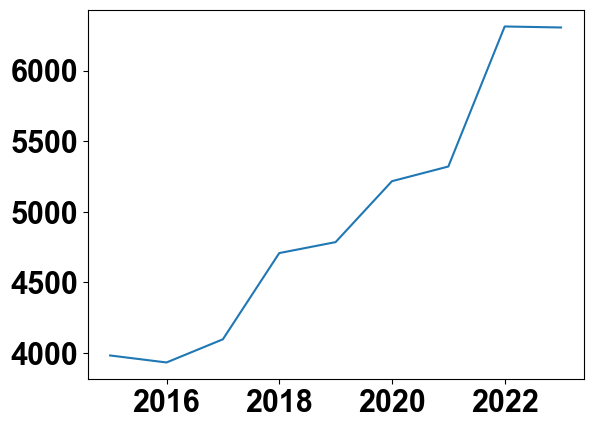

In [19]:
# plot
means = df["solar_gen"].groupby(df["date"].dt.year).mean()
plt.plot(means)

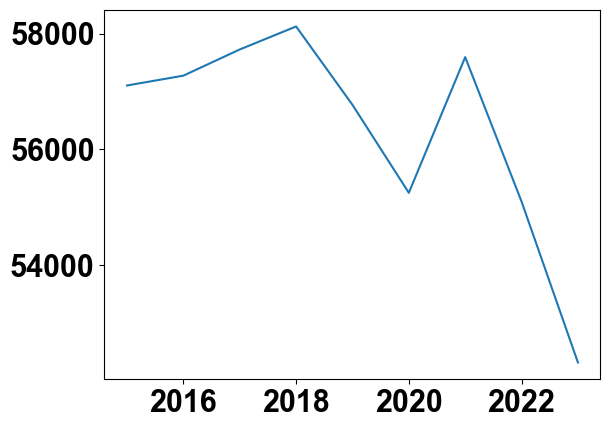

In [20]:
means = df["load"].groupby(df["date"].dt.year).mean()
plt.plot(means)

In [21]:
#means = df["hydro_storage_gen"].groupby(df["date"].dt.year).mean()
#plt.plot(means)

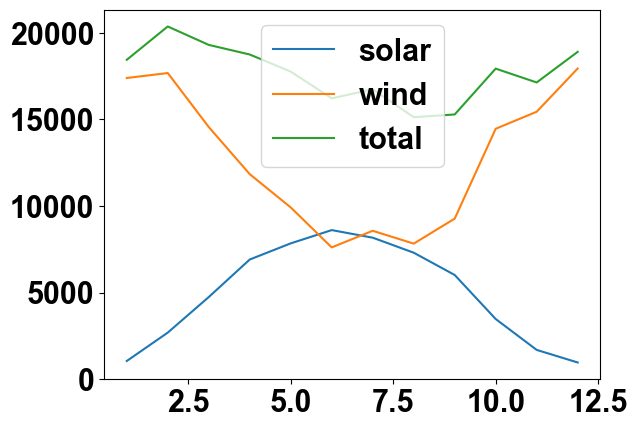

In [22]:
# plot
means_solar = df["solar_gen"].groupby(df["date"].dt.month).mean()
means_wind = df["wind_gen"].groupby(df["date"].dt.month).mean()

plt.plot(means_solar, label="solar")
plt.plot(means_wind, label="wind")
plt.plot(means_solar+means_wind, label="total")
plt.legend()

# Dunkelflaute in autumn (less sun but not yet a lot of wind)

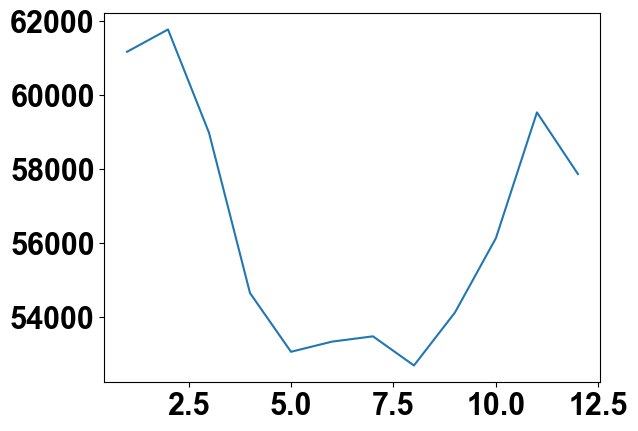

In [23]:
means_load = df["load"].groupby(df["date"].dt.month).mean()
plt.plot(means_load, label="load")

In [24]:
#means = df["hydro_storage_gen"].groupby(df["date"].dt.month).mean()
#plt.plot(means)

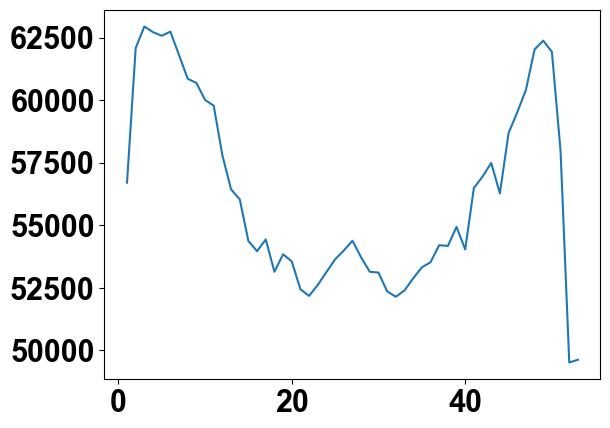

In [25]:
means_load = df["load"].groupby(df["date"].dt.isocalendar().week).mean()
plt.plot(means_load, label="load")

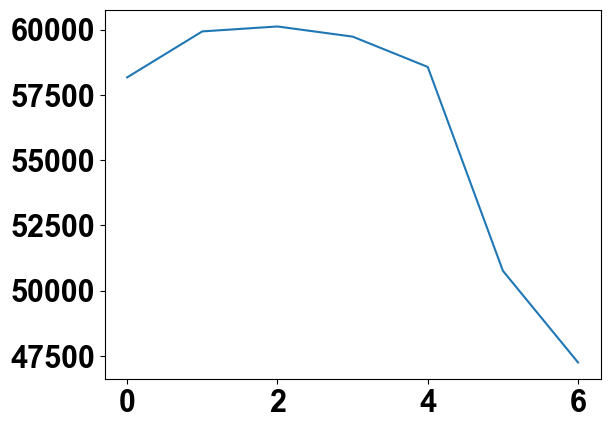

In [26]:
means_load = df["load"].groupby(df["date"].dt.dayofweek).mean()
plt.plot(means_load, label="load")

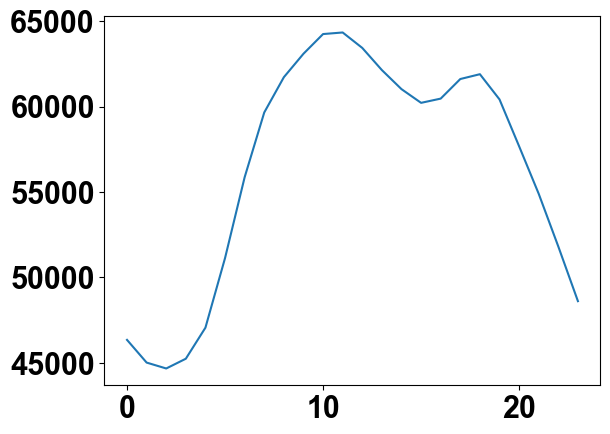

In [27]:
means_load = df["load"].groupby(df["date"].dt.hour).mean()
plt.plot(means_load, label="load")